# US-Ignite Fed_Notebook

# Data from 2009-2016

In [260]:
#import libraries from Carto.
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer
import cartoframes
cartoframes.__version__
#from cartoframes.viz.helpers import color_continuous_layer
import pandas as pd
import geopandas as gpd
import requests
import json
from autocensus import Query #Library from Socrata to gather ACS Data
from cartoframes.data.services import Geocoding
#import censusdata
#set_default_credentials('creds_usignite.json')
set_default_credentials(
    base_url='https://usignite-admin.carto.com/',
    api_key='81c922dc336bd82103d92a768816a4567c444909'
)

from cartoframes.data.observatory import Catalog, Variable, Geography, Dataset

In [261]:
import numpy as np

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import ipywidgets as widgets
from ipywidgets import Output, Tab
from IPython.display import clear_output
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Variable
from cartoframes.data.observatory import Enrichment
from cartoframes.data.observatory import Catalog

# EDA

In [262]:
import seaborn as sns

In [287]:
df_final=pd.read_csv("~/Downloads/Final_merged_2.csv")

In [285]:
#df_final=df_final[df_final['year']!=2010]
#df_final=df_final[df_final['year']!=2011]

In [286]:
df_final['NAICS2012'].unique()

array([51, 11, 21])

In [269]:
data=df_final[['zipcode', 'geoid', 'NAICS2012', 'year', 'edut',
       'collegemale', 'collegefemale','pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio']]

In [270]:
data['total_college']=data['collegemale']+data['collegefemale']
data['college_ratio']=data['total_college']/data['edut']

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [271]:
data['Empratio'][data['Empratio']!=0.0].sort_values()


951         0.023095
947         0.023095
945         0.023095
946         0.023095
1596        0.029354
1604        0.029354
1603        0.029354
1597        0.029354
1606        0.039139
1605        0.039139
1600        0.039139
1607        0.039139
1598        0.039139
1599        0.039139
12394       0.045767
950         0.046189
949         0.046189
1601        0.048924
1608        0.048924
9961        0.052493
1184        0.053520
7806        0.054517
7799        0.054517
7792        0.054517
798         0.055556
812         0.055556
5405        0.056215
5398        0.056215
1183        0.057637
1609        0.058708
            ...     
9629     2284.260171
9643     2284.260171
9636     2284.260171
10579    2388.360521
10572    2388.360521
10578    2461.143516
10571    2461.143516
10580    2531.230845
10573    2531.230845
10584    2562.511122
10591    2562.511122
11332    2804.252462
11339    2804.252462
11346    2804.252462
10570    2919.406822
10577    2919.406822
10609    3285

In [272]:
data['Empratio'].describe() 

count    12425.000000
mean        52.040267
std        229.514840
min          0.000000
25%          0.988701
50%          7.112824
75%         28.543850
max       5342.728621
Name: Empratio, dtype: float64

In [273]:
data['Empratio'].sort_values()

6212        0.000000
5351        0.000000
5352        0.000000
5353        0.000000
5354        0.000000
5355        0.000000
5356        0.000000
5350        0.000000
5357        0.000000
5359        0.000000
5360        0.000000
5361        0.000000
783         0.000000
782         0.000000
781         0.000000
5358        0.000000
780         0.000000
5349        0.000000
5186        0.000000
5172        0.000000
5173        0.000000
5174        0.000000
5175        0.000000
5176        0.000000
5177        0.000000
5348        0.000000
5178        0.000000
5180        0.000000
5181        0.000000
5182        0.000000
            ...     
9629     2284.260171
9643     2284.260171
9636     2284.260171
10579    2388.360521
10572    2388.360521
10578    2461.143516
10571    2461.143516
10573    2531.230845
10580    2531.230845
10584    2562.511122
10591    2562.511122
11346    2804.252462
11339    2804.252462
11332    2804.252462
10577    2919.406822
10570    2919.406822
10602    3285

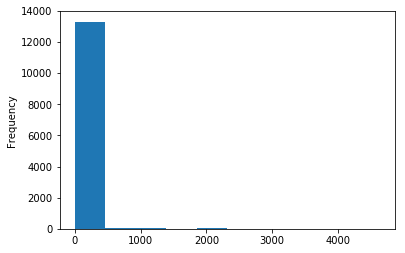

In [162]:
data['Empratio'].plot(kind ="hist")

In [163]:
data['estabratio'].describe() 

count    13520.000000
mean         1.758780
std          5.017687
min          0.000000
25%          0.055363
50%          0.391575
75%          1.357362
max         67.585764
Name: estabratio, dtype: float64

In [164]:
data['logesration']=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


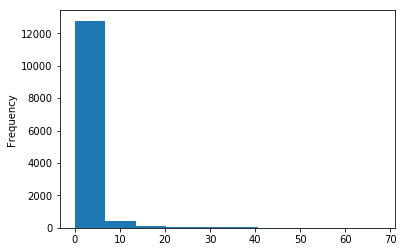

In [165]:
data['estabratio'].plot(kind ="hist")

In [166]:
loges=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [167]:
data['gini'].describe() 

count    13401.000000
mean         0.412628
std          0.059632
min          0.012800
25%          0.372800
50%          0.409000
75%          0.449300
max          0.700700
Name: gini, dtype: float64

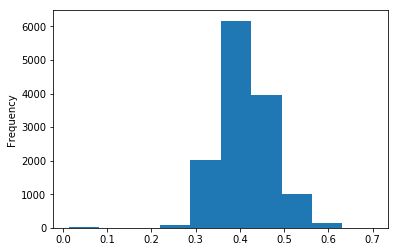

In [168]:
data['gini'].plot(kind ="hist") 

In [169]:
corr=data.corr().abs()

#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'geoid'),
 Text(2.5, 0, 'NAICS2012'),
 Text(3.5, 0, 'year'),
 Text(4.5, 0, 'edut'),
 Text(5.5, 0, 'collegemale'),
 Text(6.5, 0, 'collegefemale'),
 Text(7.5, 0, 'pop'),
 Text(8.5, 0, 'households'),
 Text(9.5, 0, 'income'),
 Text(10.5, 0, 'gini'),
 Text(11.5, 0, 'total_p'),
 Text(12.5, 0, 'ratio_65'),
 Text(13.5, 0, 'Empratio'),
 Text(14.5, 0, 'estabratio'),
 Text(15.5, 0, 'total_college'),
 Text(16.5, 0, 'college_ratio'),
 Text(17.5, 0, 'logesration')]

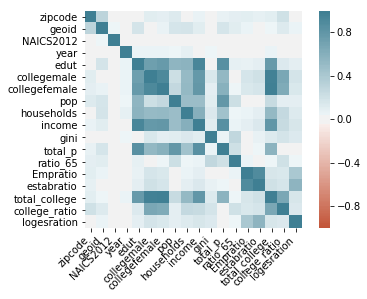

In [170]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# modeling 

In [171]:
df=data

In [172]:
df.columns

Index(['zipcode', 'geoid', 'NAICS2012', 'year', 'edut', 'collegemale',
       'collegefemale', 'pop', 'households', 'income', 'gini', 'total_p',
       'ratio_65', 'Empratio', 'estabratio', 'total_college', 'college_ratio',
       'logesration'],
      dtype='object')

In [173]:
df.head()

,zipcode,geoid,NAICS2012,year,edut,collegemale,collegefemale,pop,households,income,gini,total_p,ratio_65,Empratio,estabratio,total_college,college_ratio,logesration
2,91901,6073015502,0,2012,1790.0,124.0,107.0,291.0,113.0,904.0,0.3790,2748,0.108806,0.293542,0.029354,231.0,0.129050,-3.528319
3,91901,6073015502,0,2013,1900.0,141.0,148.0,365.0,136.0,903.0,0.3782,2748,0.108806,0.176125,0.017613,289.0,0.152105,-4.039145
4,91901,6073015502,0,2014,1865.0,143.0,135.0,411.0,154.0,883.0,0.3837,2748,0.108806,0.234834,0.023483,278.0,0.149062,-3.751463
5,91901,6073015502,0,2015,2005.0,126.0,152.0,454.0,170.0,949.0,0.3917,2748,0.108806,0.645793,0.017613,278.0,0.138653,-4.039145
6,91901,6073015502,0,2016,2017.0,108.0,151.0,499.0,189.0,950.0,0.4479,2748,0.108806,0.704501,0.023483,259.0,0.128409,-3.751463


In [174]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [175]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
df['year']=df['year'].dt.year

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
#add column year to index
df=df.set_index([ 'zipcode','year'])
#swap indexes




In [178]:
import statsmodels.formula.api as smf

In [179]:
df.columns

Index(['geoid', 'NAICS2012', 'edut', 'collegemale', 'collegefemale', 'pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio', 'total_college', 'college_ratio', 'logesration'],
      dtype='object')

In [180]:
FE_ols1 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut+total_college', data = df).fit()
print(FE_ols1.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          5.51e-166
Time:                        13:38:55   Log-Likelihood:                -40457.
No. Observations:               13465   AIC:                         8.093e+04
Df Residuals:                   13458   BIC:                         8.098e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3644      0.170      8.028

In [181]:
FE_ols2 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut+college_ratio', data = df).fit()
print(FE_ols2.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.69e-157
Time:                        13:38:56   Log-Likelihood:                -40420.
No. Observations:               13443   AIC:                         8.085e+04
Df Residuals:                   13436   BIC:                         8.091e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0786      0.174      0.451

In [182]:
FE_ols3 = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut', data = df).fit()
print(FE_ols3.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     114.4
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          8.65e-119
Time:                        13:38:56   Log-Likelihood:                -40568.
No. Observations:               13465   AIC:                         8.115e+04
Df Residuals:                   13459   BIC:                         8.119e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7767      0.167      4.658      0.0

In [183]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+income+ratio_65+edut', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.89e-112
Time:                        13:38:57   Log-Likelihood:                -40586.
No. Observations:               13465   AIC:                         8.118e+04
Df Residuals:                   13460   BIC:                         8.122e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3603      0.134     10.148      0.0

In [184]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [185]:
df.columns

Index(['geoid', 'NAICS2012', 'edut', 'collegemale', 'collegefemale', 'pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio', 'total_college', 'college_ratio', 'logesration'],
      dtype='object')

In [186]:

year = pd.to_datetime(data['year'], format='%Y')

In [187]:

year = pd.Categorical(year)

In [188]:
df['year'] = year

In [189]:
df['year']=df['year'].apply(lambda x: x.strftime('%Y') )

In [190]:
df.dropna(inplace=True)

In [191]:

exog_vars = ['pop','income','ratio_65','edut','year']
exog = sm.add_constant(df[exog_vars])

In [192]:
df.isnull().values.any()
df.isnull().sum()

geoid            0
NAICS2012        0
edut             0
collegemale      0
collegefemale    0
pop              0
households       0
income           0
gini             0
total_p          0
ratio_65         0
Empratio         0
estabratio       0
total_college    0
college_ratio    0
logesration      0
year             0
dtype: int64

In [193]:
from linearmodels.panel import RandomEffects
mod = RandomEffects(df.estabratio , exog)


In [194]:
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:             estabratio   R-squared:                        0.0362
Estimator:              RandomEffects   R-squared (Between):              0.0011
No. Observations:               13380   R-squared (Within):               0.0360
Date:                Wed, Mar 11 2020   R-squared (Overall):              0.0319
Time:                        13:39:00   Log-likelihood                -3.826e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      62.834
Entities:                          85   P-value                           0.0000
Avg Obs:                       157.41   Distribution:                 F(8,13371)
Min Obs:                       5.0000                                           
Max Obs:                       360.00   F-statistic (robust):             62.056
                            

In [195]:

exog_vars1 = ['pop','income','ratio_65','edut']
exog1 = sm.add_constant(df[exog_vars1])

In [196]:
FE_olsfinal = smf.ols(formula= 'estabratio ~ 1 +pop+income+ratio_65+edut', data = df).fit()
print(FE_olsfinal.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 11 Mar 2020   Prob (F-statistic):          1.37e-111
Time:                        13:39:00   Log-Likelihood:                -40368.
No. Observations:               13380   AIC:                         8.075e+04
Df Residuals:                   13375   BIC:                         8.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4274      0.139     10.233      0.0

In [197]:
mod2 = PanelOLS(df.estabratio, exog1, entity_effects=True, time_effects=True)
fe_te_res = mod2.fit()
print(fe_te_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:             estabratio   R-squared:                        0.0358
Estimator:                   PanelOLS   R-squared (Between):             -0.0086
No. Observations:               13380   R-squared (Within):               0.0356
Date:                Wed, Mar 11 2020   R-squared (Overall):              0.0370
Time:                        13:39:00   Log-likelihood                -3.822e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      123.26
Entities:                          85   P-value                           0.0000
Avg Obs:                       157.41   Distribution:                 F(4,13287)
Min Obs:                       5.0000                                           
Max Obs:                       360.00   F-statistic (robust):             123.26
                            

In [198]:
from linearmodels.panel import compare
print(compare({'RE':re_res,'Pooled':fe_te_res}))

                    Model Comparison                    
                                       RE         Pooled
--------------------------------------------------------
Dep. Variable                  estabratio     estabratio
Estimator                   RandomEffects       PanelOLS
No. Observations                    13380          13380
Cov. Est.                      Unadjusted     Unadjusted
R-squared                          0.0362         0.0358
R-Squared (Within)                 0.0360         0.0356
R-Squared (Between)                0.0011        -0.0086
R-Squared (Overall)                0.0319         0.0370
F-statistic                        62.834         123.26
P-value (F-stat)                   0.0000         0.0000
=====================     ===============   ============
const                              1.8003         1.5131
                                 (3.9087)       (10.738)
pop                               -0.0033        -0.0033
                               

In [300]:
df_final=df_final.dropna()

In [301]:
df_final['Empratio'][df_final['Empratio']!=0.0].sort_values()
df_final['total_college']=df_final['collegemale']+df_final['collegefemale']
df_final['college_ratio']=df_final['total_college']/df_final['edut']

In [302]:
from shapely import wkt

df_final['geometry'] = df_final['geometry'].apply(wkt.loads)
df_final['centroid'] = df_final['centroid'].apply(wkt.loads)



AttributeError: 'MultiPolygon' object has no attribute 'encode'

In [303]:

dfshp = gp.GeoDataFrame(df_final, geometry='geometry')

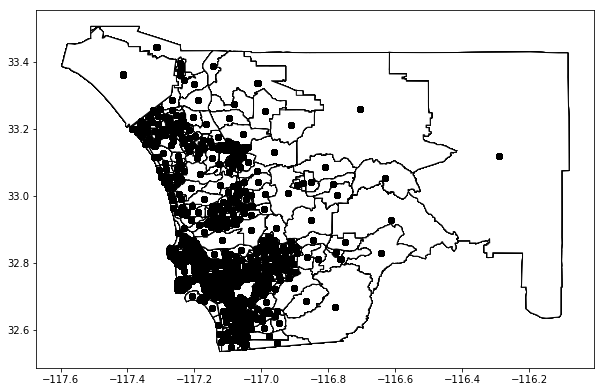

In [304]:

fig, ax = plt.subplots(figsize = (10, 10))
dfshp.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
dfshp.centroid.plot(ax = ax, c = 'black')
plt.savefig('sd_shp')
plt.show()

In [305]:
dfshp.head()

,Unnamed: 0,geo_id,pop,centroid,year,geometry,edut,collegemale,collegefemale,households,...,gini,total_p,ratio_65,zipcode,geoid,NAICS2012,Empratio,estabratio,total_college,college_ratio
0,318,6073015502,208.0,POINT (-116.8304254797509 32.81131603277056),2010,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1651.0,130.0,107.0,83.0,...,0.4400,2748,0.108806,91901,6073015502,51,0.176125,0.017613,237.0,0.143549
1,318,6073015502,234.0,POINT (-116.8304254797509 32.81131603277056),2011,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1717.0,124.0,114.0,95.0,...,0.4080,2748,0.108806,91901,6073015502,51,0.176125,0.017613,238.0,0.138614
2,318,6073015502,291.0,POINT (-116.8304254797509 32.81131603277056),2012,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1790.0,124.0,107.0,113.0,...,0.3790,2748,0.108806,91901,6073015502,51,0.293542,0.029354,231.0,0.129050
3,318,6073015502,365.0,POINT (-116.8304254797509 32.81131603277056),2013,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1900.0,141.0,148.0,136.0,...,0.3782,2748,0.108806,91901,6073015502,51,0.176125,0.017613,289.0,0.152105
4,318,6073015502,411.0,POINT (-116.8304645225708 32.81130364624261),2014,"MULTIPOLYGON (((-116.85839 32.81723, -116.8547...",1865.0,143.0,135.0,154.0,...,0.3837,2748,0.108806,91901,6073015502,51,0.234834,0.023483,278.0,0.149062


In [306]:
g_y=dfshp['estabratio'].values.reshape((-1, 1))

In [307]:
g_X =dfshp[['pop','income','ratio_65','edut','total_college']].values

In [308]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp['centroid']))]

In [309]:
g_coords = g_coords = list(zip(x, y))

In [310]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [311]:
gwr_bw = gwr_selector.search()

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.031351e-17
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.120854e-19
  xtx_inv_xt = linalg.solve(xtx, xT)
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/spglm/iwls.py:37: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.115571e-19
  xtx_inv_xt = linalg.solve(xtx, xT)


In [312]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)

In [313]:
gwr_results = gwr_model.fit()

In [314]:
print(gwr_results.resid_ss)

102878.90473818834


In [315]:
bws = (x for x in range(25, 175, 25))

In [316]:
print(gwr_results.aic)
print(gwr_results.aicc)
print(gwr_results.R2)


62763.36160179468
62905.884339990385
0.6804581824867799


In [317]:
len(dfshp)

12283

In [318]:
s=abs(gwr_results.localR2)

In [319]:
gwr_results.localR2

array([[ 0.66228743],
       [ 0.66228743],
       [ 0.66228743],
       ...,
       [-0.0598138 ],
       [-0.05982655],
       [-0.05981438]])

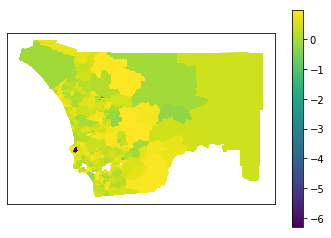

In [320]:
#Local model fit
dfshp['R2'] =gwr_results.localR2
dfshp.plot('R2', legend = True)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig('local_R2')
plt.show()

In [ ]:
##clustering
##sensor clusterings
